In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [3]:
# Compute Cost

def computeCost(X_vals, Y_vals, theta):
    J = 0
    m = Y_vals.size
    
    # Theta transpose times X
    h = X_vals.dot(theta)
    
    # Squared error
    SEs = np.square(h-Y_vals)
    
    #J
    J = (sum(SEs)[0])/(2*m)
    return J

In [4]:
# Gradient Descent

def gradientDescent(X, Y, theta, alpha, iterations):
    Js = np.zeros(iterations)
    m = Y.size
    
    for i in range(0,iterations):
        h = X.dot(theta)
        theta = theta - (X.T.dot(h-Y))*(alpha/m)
        Js[i] = computeCost(X,Y,theta)
        
    return (Js, theta)
    

In [5]:
def normalize(X):
    X_norm = X.copy()
    mus, sds = [], []
    for i in range(1, X.shape[1]):
        curr_X = X[:,i]
        mu = np.mean(X)
        mus.append(mu)
        sd = np.std(X)
        sds.append(sd)
        X_norm[:,i] = (curr_X-mu)/sd
    return (X_norm, mus, sds)


# Univariate

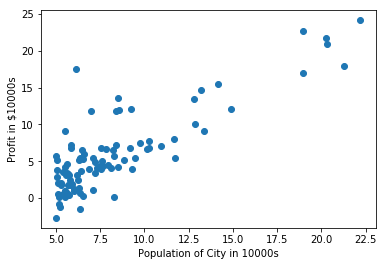

In [6]:
# 1: LOAD DATA FOR UNIVARIATE LR
datafile = 'ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',unpack=True)
X = np.transpose(np.array(cols[:-1]))
# add 1's
X = np.insert(X,0,1,axis=1)
Y = np.transpose(np.array(cols[-1:]))

# 2: SCATTERPLOT
plt.scatter(X[:,1],Y)
plt.xlabel("Population of City in 10000s")
plt.ylabel("Profit in $10000s")

32.0727338775
[[-3.63029144]
 [ 1.16636235]]


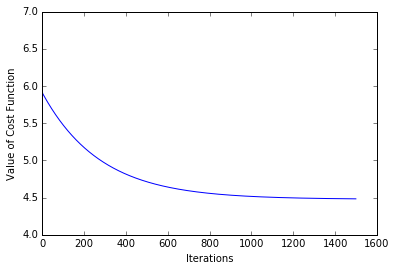

In [76]:
# 3: INITIALIZE VARIABLES/TEST
theta = [[0],[0]]
iterations = 1500
alpha = .01

print computeCost(X,Y,theta)
(Js, theta) = gradientDescent(X, Y, theta, alpha, iterations)
print theta

# 4: PLOT J
plt.plot(Js)
plt.xlabel('Iterations')
plt.ylabel('Value of Cost Function')

# Multivariate

In [7]:
# 1: LOAD DATA FOR MULTIVARIATE LR
datafile = 'ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',unpack=True) #Read in comma separated data
X = np.transpose(np.array(cols[:-1]))
# add 1's
X = np.insert(X,0,1,axis=1)
Y = np.transpose(np.array(cols[-1:]))

# 2: INITIALIZE VARIABLES/TEST
theta = [[0],[0],[0]]
iterations = 1500
alpha = .01

# Normalize X
X_norm, mus, sds = normalize(X)
(Js, theta) = gradientDescent(X_norm, Y, theta, alpha, iterations)

# 3: TEST VALUE
ytest = np.array([1650, 3.0])
ytest_scaled = [(ytest[x]-mus[x])/sds[x] for x in xrange(len(ytest))]
ytest_scaled.insert(0,1)
print np.dot(ytest_scaled,theta)

[ 293015.80453818]


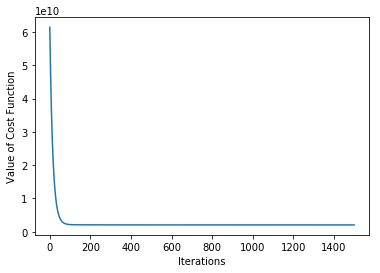

In [8]:
# 4: PLOT J
plt.plot(Js)
plt.xlabel('Iterations')
plt.ylabel('Value of Cost Function')

In [9]:
from numpy.linalg import inv

# Normal Equation
def normEquation(X,Y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),Y)


ytest_norm = np.array([1,1650, 3.0])
print np.dot(ytest_norm,normEquation(X,Y))


[ 293081.46433489]
